In [1]:
import nilearn.image, nilearn.plotting
import matplotlib.pyplot as plt

/Users/eyshin/.pyenv/versions/eyspy3.6/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
/Users/eyshin/.pyenv/versions/eyspy3.6/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/eyshin/.pyenv/versions/eyspy3.6/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: Fut

In [2]:
%config InlineBackend.figure_format = 'retina'

In [17]:
import glob

mask_fnames = sorted(glob.glob('/Volumes/clmnlab/GA/Revision/p001_40vx/Clust_*.nii'))
mask_fnames

['/Volumes/clmnlab/GA/Revision/p001_40vx/Clust_body_L_lr_p001_40vx_mask.nii',
 '/Volumes/clmnlab/GA/Revision/p001_40vx/Clust_body_R_lr_p001_40vx_mask.nii',
 '/Volumes/clmnlab/GA/Revision/p001_40vx/Clust_head_L_rewtot_p001_40vx_mask.nii',
 '/Volumes/clmnlab/GA/Revision/p001_40vx/Clust_head_R_rewtot_p001_40vx_mask.nii',
 '/Volumes/clmnlab/GA/Revision/p001_40vx/Clust_tail_L_lr_p001_40vx_mask.nii']

In [18]:
names = [(fname[45:51], fname.replace('_p001_40vx_mask.nii', '').split('_')[-1]) for fname in mask_fnames]

data_fnames = [
    '/Volumes/clmnlab/GA/Revision/Corr.caudate_%s.GA.%s.rest.WM_n29_ex_outlier.new.nii' % 
    (area, measure.replace('rewtot', 'rew_tot')) for area, measure in names]
data_fnames

['/Volumes/clmnlab/GA/Revision/Corr.caudate_body_L.GA.lr.rest.WM_n29_ex_outlier.new.nii',
 '/Volumes/clmnlab/GA/Revision/Corr.caudate_body_R.GA.lr.rest.WM_n29_ex_outlier.new.nii',
 '/Volumes/clmnlab/GA/Revision/Corr.caudate_head_L.GA.rew_tot.rest.WM_n29_ex_outlier.new.nii',
 '/Volumes/clmnlab/GA/Revision/Corr.caudate_head_R.GA.rew_tot.rest.WM_n29_ex_outlier.new.nii',
 '/Volumes/clmnlab/GA/Revision/Corr.caudate_tail_L.GA.lr.rest.WM_n29_ex_outlier.new.nii']

In [19]:
mask_imgs = [nilearn.image.load_img(fname) for fname in mask_fnames]
data_imgs = [nilearn.image.load_img(fname) for fname in data_fnames]

('body_L', 'lr')


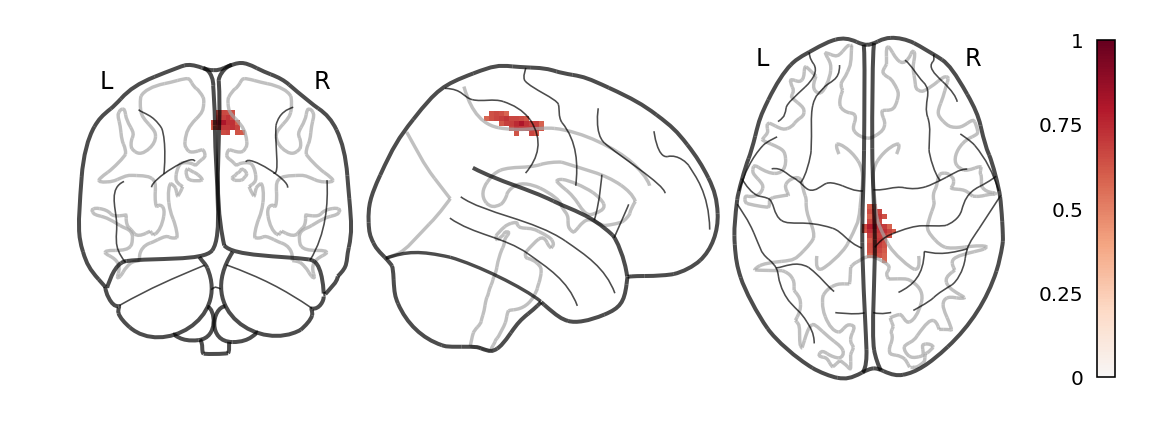

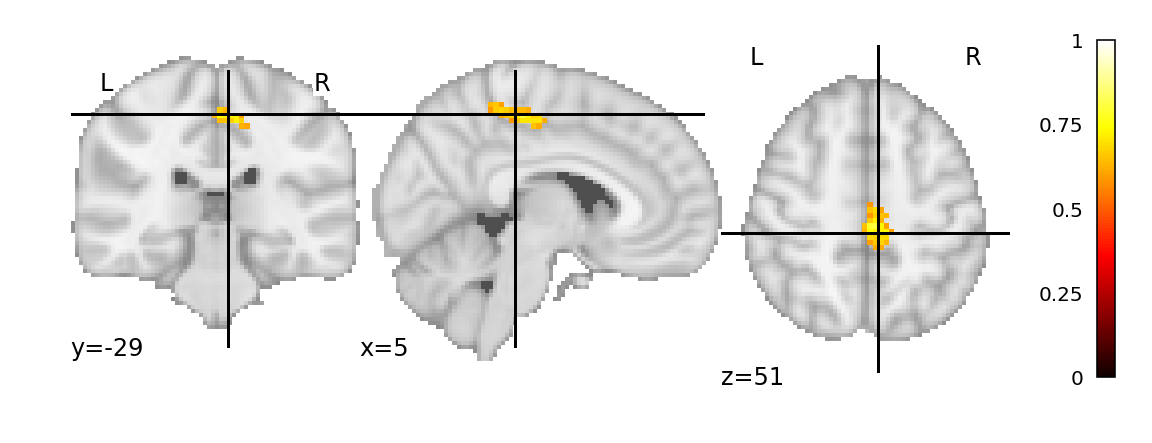

('body_R', 'lr')


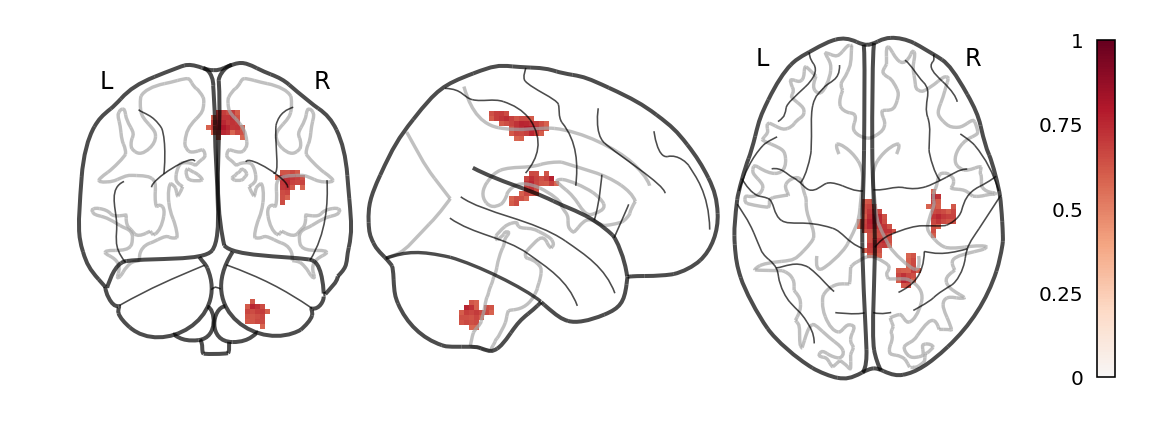

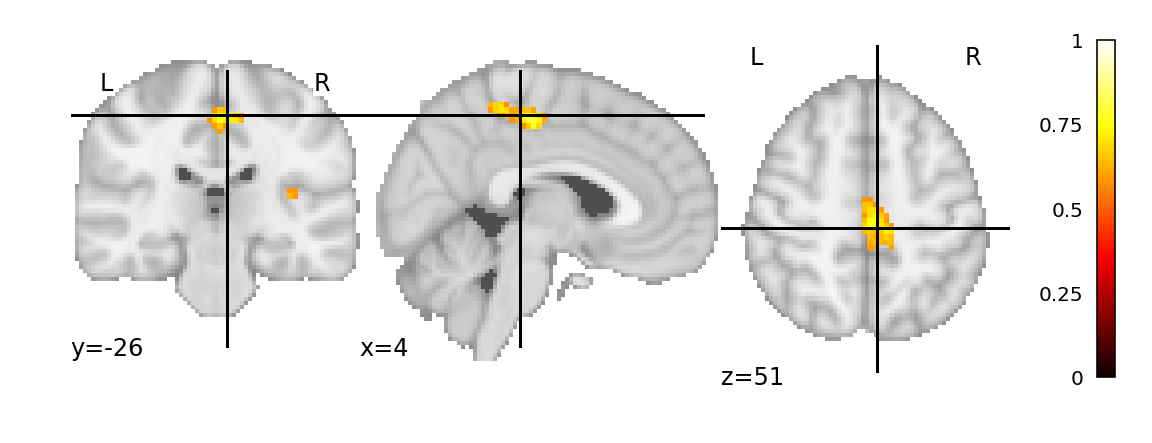

('head_L', 'rewtot')


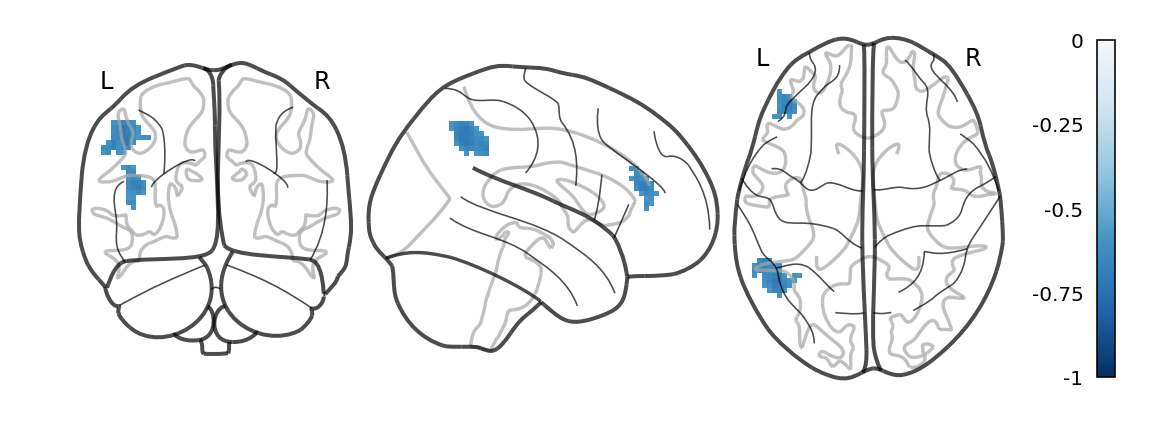

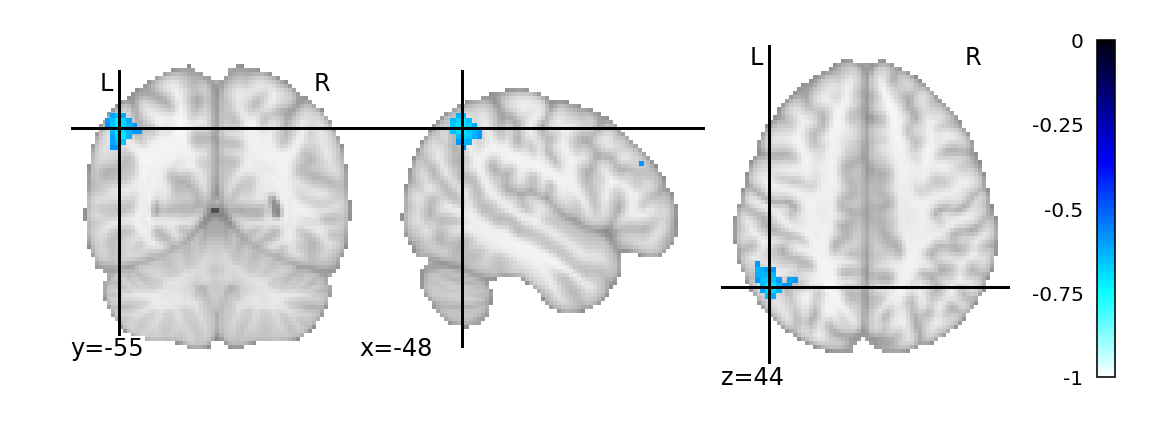

('head_R', 'rewtot')


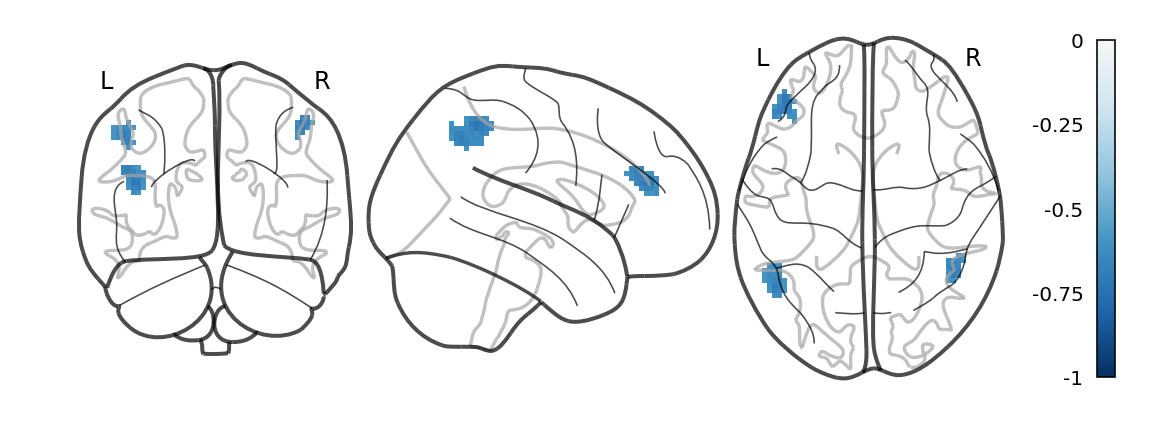

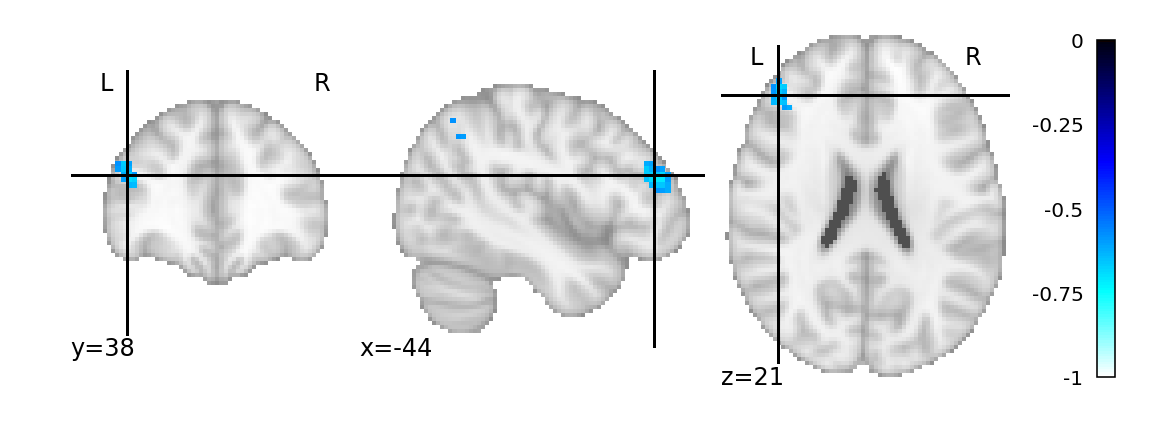

('tail_L', 'lr')


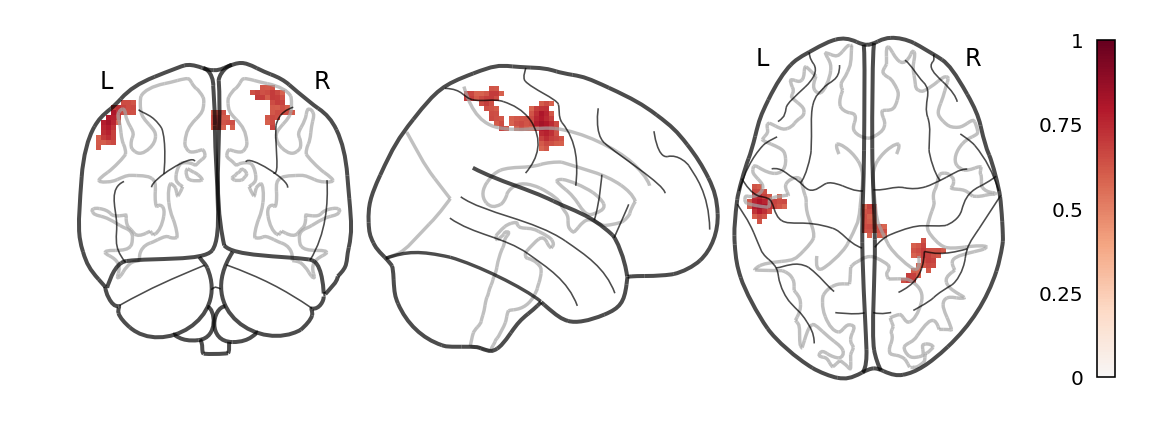

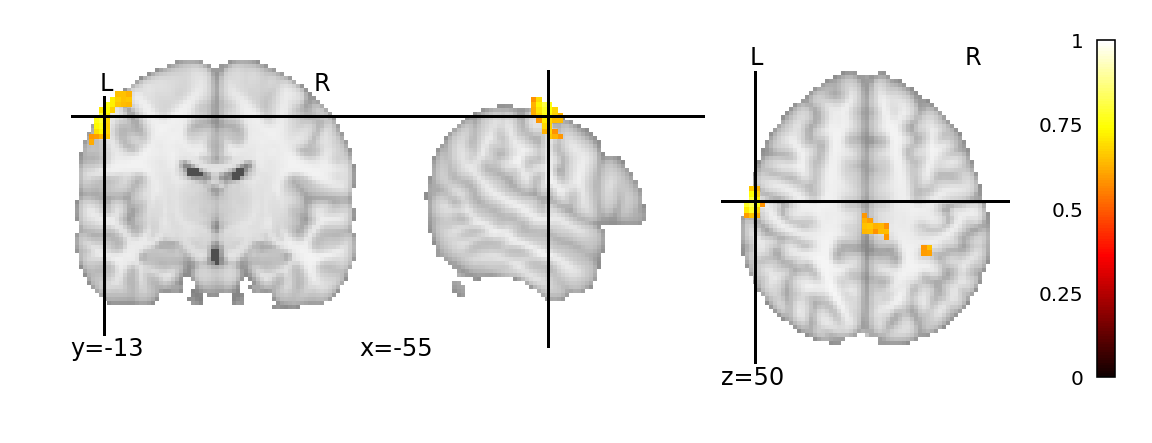

In [20]:
for mask_img, data_img, name in zip(mask_imgs, data_imgs, names):
    masked_data = nilearn.image.math_img(img1=mask_img, img2=data_img,
                                         formula='(img1 > 0) * img2')
    
    print(name)
    nilearn.plotting.plot_glass_brain(masked_data, vmax=1.0, plot_abs=False, cmap='RdBu_r', colorbar=True)
    nilearn.plotting.plot_stat_map(masked_data, vmax=1.0)
    plt.show()

('body_L', 'lr')


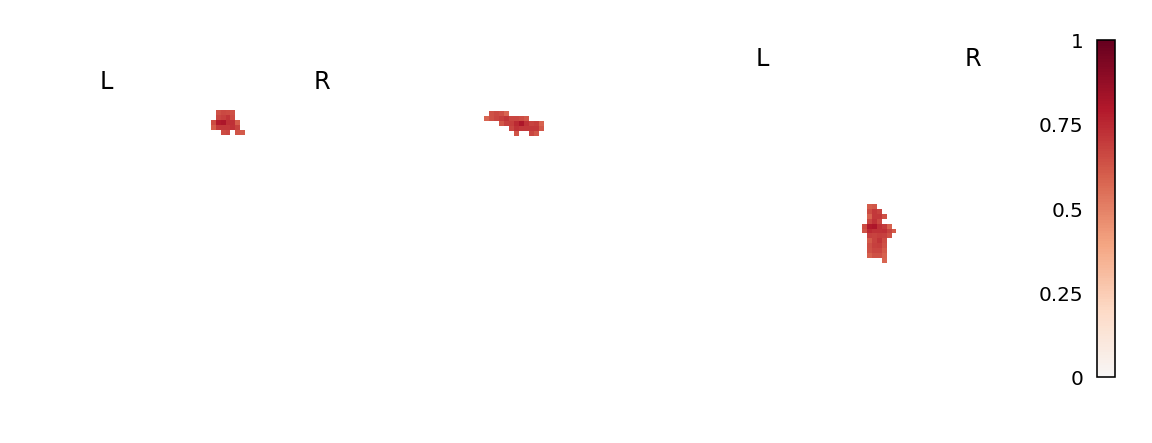

('body_R', 'lr')


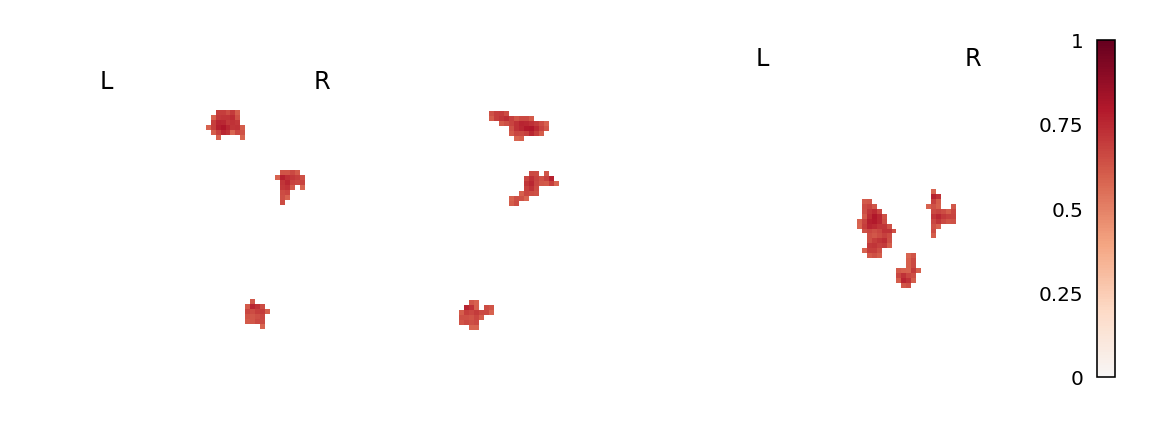

('head_L', 'rewtot')


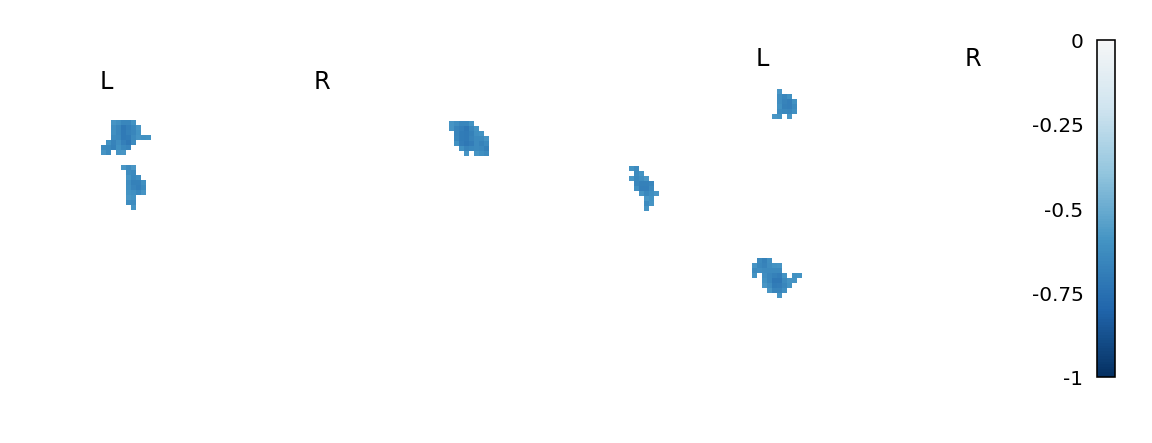

('head_R', 'rewtot')


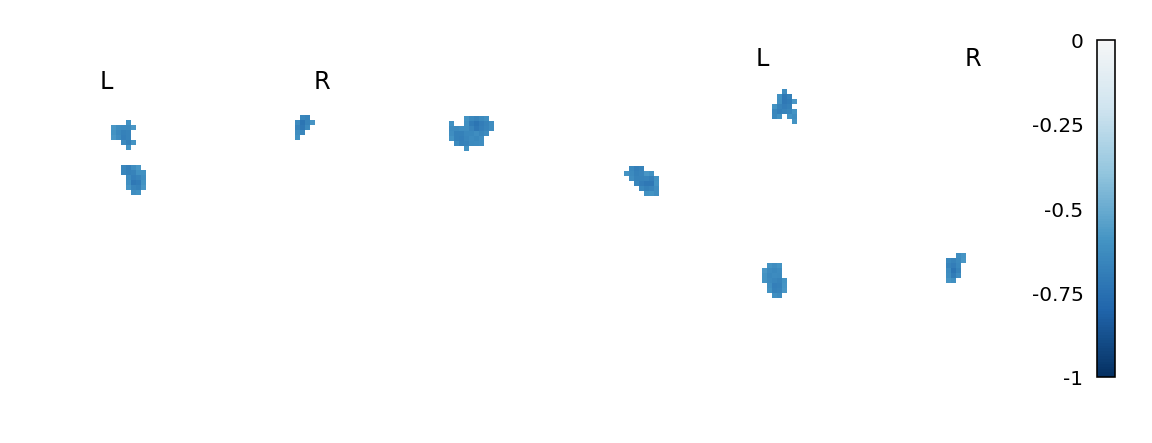

('tail_L', 'lr')


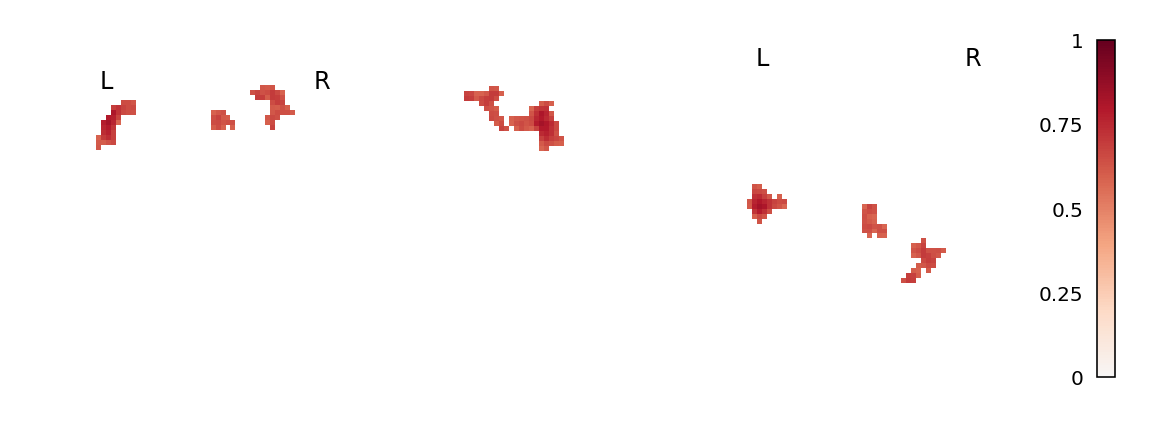

In [23]:
for mask_img, data_img, name in zip(mask_imgs, data_imgs, names):
    masked_data = nilearn.image.math_img(img1=mask_img, img2=data_img,
                                         formula='(img1 > 0) * img2')
    
    print(name)
    fig = nilearn.plotting.plot_glass_brain(masked_data, vmax=1.0, plot_abs=False, cmap='RdBu_r', colorbar=True, alpha=0)
    fig.savefig('20200506_%s_%s.png' % name, dpi=300)
    #nilearn.plotting.plot_stat_map(masked_data, vmax=1.0)
    plt.show()